In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_300','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,164
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,222
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,169
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,164
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,1
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,1
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,215
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,126


## data preparation for ann

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   rooms         54467 non-null  object 
 2   floor         54467 non-null  object 
 3   floors        54467 non-null  object 
 4   build_yr      54467 non-null  float64
 5   price_of_sqm  54467 non-null  float64
 6   cluster       54467 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,1956.0,13777.777778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014.0,6869.254341,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1910.0,4479.840717,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,16024.590164,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978.0,7988.350322,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,2020.0,13394.495413,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,2020.0,10714.285714,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,2009.0,7912.087912,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,2019.0,13555.555556,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(40850, 373)

In [18]:
X_test.shape

(13617, 373)

In [19]:
X_train

array([[0.96590909, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98863636, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98484848, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98106061, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.95075758, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98106061, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## creating model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',random_state=0)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                5984      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________


In [23]:
# from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=5000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 40850 samples, validate on 13617 samples
Epoch 1/5000
40850/40850 [==============================] - 1s 25us/sample - loss: 101764132.8505 - val_loss: 102112827.1425
Epoch 2/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 99206803.0457 - val_loss: 95625296.9130
Epoch 3/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 83814875.0441 - val_loss: 68951141.6535
Epoch 4/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 48477105.2984 - val_loss: 30610849.8769
Epoch 5/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 21126469.7584 - val_loss: 17209653.4157
Epoch 6/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 15607987.9352 - val_loss: 15615638.0710
Epoch 7/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 14482178.5949 - val_loss: 14662635.8514
Epoch 8/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 1361

40850/40850 [==============================] - 0s 12us/sample - loss: 5761132.3233 - val_loss: 6093464.9458
Epoch 68/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5759688.2401 - val_loss: 6092787.1981
Epoch 69/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5758063.0337 - val_loss: 6090975.0163
Epoch 70/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5754857.7503 - val_loss: 6090119.0527
Epoch 71/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5752729.6235 - val_loss: 6091094.9117
Epoch 72/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5751040.9114 - val_loss: 6085579.5554
Epoch 73/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5747107.4907 - val_loss: 6085582.6245
Epoch 74/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5747409.3293 - val_loss: 6086525.9557
Epoch 75/5000
40850/40850 [===========

Epoch 134/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5710822.9918 - val_loss: 6068577.2952
Epoch 135/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5710376.2384 - val_loss: 6068146.2066
Epoch 136/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5708845.7356 - val_loss: 6067965.8361
Epoch 137/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5708846.4509 - val_loss: 6068916.5010
Epoch 138/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5708474.8600 - val_loss: 6069577.3760
Epoch 139/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5711060.9192 - val_loss: 6067530.2231
Epoch 140/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5709359.5529 - val_loss: 6068196.8000
Epoch 141/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5708600.3213 - val_loss: 6070399.8241
Epoch 142/5000
4

40850/40850 [==============================] - 1s 12us/sample - loss: 5697704.6178 - val_loss: 6058370.3763
Epoch 201/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5697165.4207 - val_loss: 6058143.7635
Epoch 202/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5694653.9342 - val_loss: 6059777.8702
Epoch 203/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5695763.9810 - val_loss: 6056843.6699
Epoch 204/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5694642.8737 - val_loss: 6054233.7134
Epoch 205/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5692524.6019 - val_loss: 6053917.9919
Epoch 206/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5692266.1476 - val_loss: 6052107.2098
Epoch 207/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5690513.6018 - val_loss: 6051505.0614
Epoch 208/5000
40850/40850 [===

Epoch 267/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5628992.6549 - val_loss: 5975752.6875
Epoch 268/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5628302.8077 - val_loss: 5977082.2782
Epoch 269/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5626825.2846 - val_loss: 5974116.8325
Epoch 270/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5627210.2626 - val_loss: 5970698.3111
Epoch 271/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5625864.1341 - val_loss: 5974225.2331
Epoch 272/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5624333.5362 - val_loss: 5970694.0631
Epoch 273/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5624053.0697 - val_loss: 5974824.0002
Epoch 274/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5623214.0373 - val_loss: 5968074.3032
Epoch 275/5000
40

40850/40850 [==============================] - 0s 10us/sample - loss: 5569580.9907 - val_loss: 5917424.6832
Epoch 334/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5567716.0711 - val_loss: 5915301.3940
Epoch 335/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5566597.3081 - val_loss: 5916898.2483
Epoch 336/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5565777.0352 - val_loss: 5914308.5530
Epoch 337/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5564509.6967 - val_loss: 5913774.8384
Epoch 338/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5566212.8580 - val_loss: 5914202.6655
Epoch 339/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5564011.4895 - val_loss: 5914574.2357
Epoch 340/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5562351.3219 - val_loss: 5913628.5130
Epoch 341/5000
40850/40850 [====

Epoch 400/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5522388.3362 - val_loss: 5880979.5918
Epoch 401/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5522131.9534 - val_loss: 5881438.4831
Epoch 402/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5521821.1227 - val_loss: 5879987.2375
Epoch 403/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5521198.1318 - val_loss: 5879756.7116
Epoch 404/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5520318.2669 - val_loss: 5883204.4719
Epoch 405/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5519246.6320 - val_loss: 5880679.5698
Epoch 406/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5519664.9256 - val_loss: 5878098.0679
Epoch 407/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5520380.0357 - val_loss: 5887353.8659
Epoch 408/5000
40

40850/40850 [==============================] - 0s 10us/sample - loss: 5503880.2551 - val_loss: 5863543.9889
Epoch 467/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5501926.9751 - val_loss: 5868202.8549
Epoch 468/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5503773.7848 - val_loss: 5866933.3624
Epoch 469/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5501616.2519 - val_loss: 5870965.7077
Epoch 470/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5502715.0162 - val_loss: 5865475.1110
Epoch 471/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5502152.9932 - val_loss: 5863288.5814
Epoch 472/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5501986.6388 - val_loss: 5861952.0311
Epoch 473/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5500803.5017 - val_loss: 5863283.7803
Epoch 474/5000
40850/40850 [====

Epoch 533/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5471616.5938 - val_loss: 5843563.2408
Epoch 534/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5471343.8063 - val_loss: 5845777.9385
Epoch 535/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5471831.0958 - val_loss: 5839912.1998
Epoch 536/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5467471.6790 - val_loss: 5841058.4701
Epoch 537/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5468962.8895 - val_loss: 5838446.3533
Epoch 538/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5465566.2163 - val_loss: 5840184.7246
Epoch 539/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5467535.0200 - val_loss: 5840462.3795
Epoch 540/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5467892.7961 - val_loss: 5836990.4885
Epoch 541/5000
4

40850/40850 [==============================] - 0s 11us/sample - loss: 5374249.4521 - val_loss: 5776851.4275
Epoch 600/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5372891.8736 - val_loss: 5778146.4407
Epoch 601/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5372819.3696 - val_loss: 5775186.9485
Epoch 602/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5369733.7899 - val_loss: 5781914.3936
Epoch 603/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5367687.6135 - val_loss: 5774194.5248
Epoch 604/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5366061.2593 - val_loss: 5773293.9845
Epoch 605/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5363334.4829 - val_loss: 5770715.2414
Epoch 606/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5361224.5940 - val_loss: 5771134.4930
Epoch 607/5000
40850/40850 [===

40850/40850 [==============================] - 0s 11us/sample - loss: 5274219.1576 - val_loss: 5719171.2521
Epoch 666/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5272218.8989 - val_loss: 5718719.2710
Epoch 667/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5272050.8758 - val_loss: 5717975.9869
Epoch 668/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5272226.5146 - val_loss: 5720572.4652
Epoch 669/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5271535.8669 - val_loss: 5724826.2875
Epoch 670/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5269372.1529 - val_loss: 5725127.4065
Epoch 671/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5267780.9435 - val_loss: 5719117.4712
Epoch 672/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5266657.3230 - val_loss: 5717693.8381
Epoch 673/5000
40850/40850 [===

Epoch 732/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5210333.2940 - val_loss: 5664243.1825
Epoch 733/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5208785.8347 - val_loss: 5680722.0755
Epoch 734/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5208517.3655 - val_loss: 5669981.6564
Epoch 735/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5208477.9163 - val_loss: 5663266.5799
Epoch 736/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5207327.8950 - val_loss: 5660661.1316
Epoch 737/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5205416.0909 - val_loss: 5658951.2729
Epoch 738/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5206494.9327 - val_loss: 5660907.7146
Epoch 739/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5204600.2418 - val_loss: 5657426.7849
Epoch 740/5000
40

40850/40850 [==============================] - 0s 11us/sample - loss: 5162433.9298 - val_loss: 5605343.7538
Epoch 799/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5162114.8735 - val_loss: 5603496.8668
Epoch 800/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5160852.9942 - val_loss: 5603288.0813
Epoch 801/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5159763.0382 - val_loss: 5602373.4217
Epoch 802/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5159943.4932 - val_loss: 5600155.1371
Epoch 803/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5159712.1918 - val_loss: 5601903.7256
Epoch 804/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5159059.2148 - val_loss: 5614542.7073
Epoch 805/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5158568.3553 - val_loss: 5599922.5689
Epoch 806/5000
40850/40850 [===

40850/40850 [==============================] - 0s 9us/sample - loss: 5131690.8271 - val_loss: 5565747.2565
Epoch 865/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5129473.3548 - val_loss: 5565246.3672
Epoch 866/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5129142.4487 - val_loss: 5575915.0087
Epoch 867/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5128319.4567 - val_loss: 5564222.9078
Epoch 868/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5128277.5947 - val_loss: 5584167.6684
Epoch 869/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5129627.2408 - val_loss: 5565892.1058
Epoch 870/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5126673.1679 - val_loss: 5565005.0589
Epoch 871/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5127349.0907 - val_loss: 5562760.0138
Epoch 872/5000
40850/40850 [==========

40850/40850 [==============================] - 0s 9us/sample - loss: 5099407.2794 - val_loss: 5543907.6556
Epoch 931/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5096793.2873 - val_loss: 5540761.7265
Epoch 932/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5098408.9815 - val_loss: 5539693.3233
Epoch 933/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5097982.3481 - val_loss: 5538444.3167
Epoch 934/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5098326.3353 - val_loss: 5538527.2066
Epoch 935/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5096617.9145 - val_loss: 5537147.5659
Epoch 936/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 5097249.7541 - val_loss: 5538965.1073
Epoch 937/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5097731.3274 - val_loss: 5542257.7922
Epoch 938/5000
40850/40850 [=======

Epoch 997/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5080733.0565 - val_loss: 5527889.8512
Epoch 998/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5079091.8746 - val_loss: 5534324.8604
Epoch 999/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5078578.0870 - val_loss: 5529587.1541
Epoch 1000/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5080153.7224 - val_loss: 5529445.4688
Epoch 1001/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5078044.7046 - val_loss: 5540619.1499
Epoch 1002/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5079096.1531 - val_loss: 5529360.0800
Epoch 1003/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5081142.7064 - val_loss: 5527477.5899
Epoch 1004/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5077520.0424 - val_loss: 5527822.7340
Epoch 1005/

40850/40850 [==============================] - 1s 13us/sample - loss: 5067080.6900 - val_loss: 5520542.7368
Epoch 1064/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5066899.5847 - val_loss: 5521116.0112
Epoch 1065/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5068629.2347 - val_loss: 5529521.4838
Epoch 1066/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5066662.3481 - val_loss: 5522768.6396
Epoch 1067/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5066322.4841 - val_loss: 5519908.4379
Epoch 1068/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5066981.5938 - val_loss: 5520408.1798
Epoch 1069/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5064979.9462 - val_loss: 5520299.7552
Epoch 1070/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5065760.4881 - val_loss: 5520944.3095
Epoch 1071/5000
40850/40

Epoch 1129/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5055195.9753 - val_loss: 5523959.1644
Epoch 1130/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5056421.0468 - val_loss: 5513017.9832
Epoch 1131/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5055871.3610 - val_loss: 5511621.7874
Epoch 1132/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5057621.4918 - val_loss: 5513006.4048
Epoch 1133/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5054325.8145 - val_loss: 5512784.8640
Epoch 1134/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5055150.9471 - val_loss: 5513459.1056
Epoch 1135/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5055921.4872 - val_loss: 5516489.7421
Epoch 1136/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5054894.0319 - val_loss: 5516409.7505
Epoch 11

40850/40850 [==============================] - 1s 25us/sample - loss: 5047950.3518 - val_loss: 5501311.0924
Epoch 1196/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 5047806.6136 - val_loss: 5503855.5742
Epoch 1197/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5046324.8127 - val_loss: 5502188.5885
Epoch 1198/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 5046569.9978 - val_loss: 5501121.5313
Epoch 1199/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5046305.3705 - val_loss: 5513112.2903
Epoch 1200/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5044617.9362 - val_loss: 5505036.6931
Epoch 1201/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5047276.1853 - val_loss: 5505177.4958
Epoch 1202/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5046721.2510 - val_loss: 5499200.0875
Epoch 1203/5000
40850/40

Epoch 1261/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5039204.1645 - val_loss: 5490403.4030
Epoch 1262/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5038385.8212 - val_loss: 5490034.8555
Epoch 1263/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5042414.8270 - val_loss: 5490079.2043
Epoch 1264/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5036989.9478 - val_loss: 5492827.9311
Epoch 1265/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5039670.2644 - val_loss: 5489302.5792
Epoch 1266/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5038303.0136 - val_loss: 5488175.8254
Epoch 1267/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5037932.4941 - val_loss: 5489079.3985
Epoch 1268/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5038219.0962 - val_loss: 5491517.5047
Epoch 12

40850/40850 [==============================] - 0s 12us/sample - loss: 5031034.6333 - val_loss: 5483210.7162
Epoch 1328/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5030955.0052 - val_loss: 5486222.1146
Epoch 1329/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5032001.7043 - val_loss: 5485658.2971
Epoch 1330/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5030593.9696 - val_loss: 5485359.9004
Epoch 1331/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5031622.3064 - val_loss: 5481551.0301
Epoch 1332/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5031017.4732 - val_loss: 5490753.9588
Epoch 1333/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5030607.5392 - val_loss: 5481467.8452
Epoch 1334/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5031340.0006 - val_loss: 5480150.6887
Epoch 1335/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 5025448.5888 - val_loss: 5478748.8099
Epoch 1394/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5025547.5525 - val_loss: 5478174.7776
Epoch 1395/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5023688.4570 - val_loss: 5475400.5279
Epoch 1396/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5023292.2460 - val_loss: 5478616.1342
Epoch 1397/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5025785.6738 - val_loss: 5477182.7842
Epoch 1398/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5023852.5364 - val_loss: 5475014.9656
Epoch 1399/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5025366.8633 - val_loss: 5477435.0750
Epoch 1400/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5025440.3219 - val_loss: 5476715.7790
Epoch 1401/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 5019087.4810 - val_loss: 5472808.6572
Epoch 1460/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5020875.5518 - val_loss: 5490210.1290
Epoch 1461/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5021753.6924 - val_loss: 5473504.3481
Epoch 1462/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5018946.7570 - val_loss: 5471894.2493
Epoch 1463/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5020525.5811 - val_loss: 5475977.4144
Epoch 1464/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5019453.3098 - val_loss: 5473303.5526
Epoch 1465/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5020182.0884 - val_loss: 5473559.7989
Epoch 1466/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5019971.1411 - val_loss: 5474649.9753
Epoch 1467/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 5016065.7830 - val_loss: 5476205.8347
Epoch 1526/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5016690.9411 - val_loss: 5473616.4715
Epoch 1527/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5015506.9197 - val_loss: 5476502.9106
Epoch 1528/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5018260.5674 - val_loss: 5477332.6913
Epoch 1529/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5016667.6803 - val_loss: 5472210.1252
Epoch 1530/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5016582.0498 - val_loss: 5475138.5318
Epoch 1531/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5016133.8228 - val_loss: 5471729.8831
Epoch 1532/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5016245.3739 - val_loss: 5469919.7279
Epoch 1533/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 5012859.0969 - val_loss: 5466326.6362
Epoch 1592/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5012644.9652 - val_loss: 5467188.1214
Epoch 1593/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5014531.4230 - val_loss: 5466064.1345
Epoch 1594/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5010541.9495 - val_loss: 5475431.5672
Epoch 1595/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5016674.7587 - val_loss: 5466056.9104
Epoch 1596/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5013677.3103 - val_loss: 5467892.6793
Epoch 1597/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5014233.2963 - val_loss: 5466012.4811
Epoch 1598/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5014510.2210 - val_loss: 5468793.7217
Epoch 1599/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 5011052.5185 - val_loss: 5465789.4457
Epoch 1658/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5009508.7641 - val_loss: 5465642.8129
Epoch 1659/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5012014.2899 - val_loss: 5463241.7836
Epoch 1660/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5010428.0010 - val_loss: 5466762.5253
Epoch 1661/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5013982.9879 - val_loss: 5468216.3015
Epoch 1662/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5012090.9647 - val_loss: 5465681.2013
Epoch 1663/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5010595.0793 - val_loss: 5465028.1150
Epoch 1664/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5010155.9658 - val_loss: 5463647.3402
Epoch 1665/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 5008546.8236 - val_loss: 5461520.4298
Epoch 1724/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5008088.5590 - val_loss: 5461471.9638
Epoch 1725/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5008429.6028 - val_loss: 5463778.0637
Epoch 1726/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5008927.2734 - val_loss: 5464360.6346
Epoch 1727/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5008165.9496 - val_loss: 5462334.7928
Epoch 1728/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5006862.9601 - val_loss: 5467312.0389
Epoch 1729/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5007239.9301 - val_loss: 5463136.6043
Epoch 1730/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 5007947.1298 - val_loss: 5464513.3929
Epoch 1731/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 5000088.5822 - val_loss: 5460840.0515
Epoch 1790/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5000841.6296 - val_loss: 5460458.7133
Epoch 1791/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5000794.8278 - val_loss: 5471439.6490
Epoch 1792/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 5000994.6548 - val_loss: 5465735.4314
Epoch 1793/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5000086.3419 - val_loss: 5461844.8085
Epoch 1794/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4999119.3171 - val_loss: 5462300.8747
Epoch 1795/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5000506.3488 - val_loss: 5460688.3014
Epoch 1796/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5000440.8498 - val_loss: 5461322.4724
Epoch 1797/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4996053.1018 - val_loss: 5461273.8932
Epoch 1856/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4995768.7562 - val_loss: 5460876.5147
Epoch 1857/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4995078.1559 - val_loss: 5468242.3462
Epoch 1858/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4994552.4653 - val_loss: 5464504.4563
Epoch 1859/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4995034.3140 - val_loss: 5463937.0344
Epoch 1860/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4994436.1249 - val_loss: 5462122.7859
Epoch 1861/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4994379.2972 - val_loss: 5460962.6482
Epoch 1862/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4994456.9196 - val_loss: 5460505.8592
Epoch 1863/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4992021.6053 - val_loss: 5459224.6255
Epoch 1922/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4992176.7470 - val_loss: 5462294.7054
Epoch 1923/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4991955.4685 - val_loss: 5459703.7769
Epoch 1924/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4993199.8183 - val_loss: 5458865.9577
Epoch 1925/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4990926.9053 - val_loss: 5475426.2538
Epoch 1926/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4991146.0073 - val_loss: 5459395.8939
Epoch 1927/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4990414.4635 - val_loss: 5461953.3415
Epoch 1928/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4991069.4698 - val_loss: 5458586.1741
Epoch 1929/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4987652.7452 - val_loss: 5461223.2359
Epoch 1988/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4989404.1627 - val_loss: 5463516.4597
Epoch 1989/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4987567.0207 - val_loss: 5458649.8346
Epoch 1990/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4987930.2109 - val_loss: 5463674.9986
Epoch 1991/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4989622.1177 - val_loss: 5458717.7431
Epoch 1992/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4988418.4318 - val_loss: 5458698.8916
Epoch 1993/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4988173.4064 - val_loss: 5462769.2068
Epoch 1994/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4987139.8477 - val_loss: 5462303.0571
Epoch 1995/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4985084.6547 - val_loss: 5464055.2435
Epoch 2054/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4983663.0019 - val_loss: 5464281.9072
Epoch 2055/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4985712.7889 - val_loss: 5462575.3286
Epoch 2056/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4985457.0856 - val_loss: 5463722.8249
Epoch 2057/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4985110.6289 - val_loss: 5464406.3481
Epoch 2058/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4984251.8479 - val_loss: 5463249.9748
Epoch 2059/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4984961.5072 - val_loss: 5463272.4221
Epoch 2060/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4984191.3422 - val_loss: 5467878.5406
Epoch 2061/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4981333.1141 - val_loss: 5478269.0351
Epoch 2120/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4980409.4853 - val_loss: 5462054.6998
Epoch 2121/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4979457.2598 - val_loss: 5471665.1105
Epoch 2122/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4980937.5889 - val_loss: 5462050.1096
Epoch 2123/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4979698.6513 - val_loss: 5462380.5608
Epoch 2124/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4978294.1071 - val_loss: 5465457.5220
Epoch 2125/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4979355.5942 - val_loss: 5461739.3623
Epoch 2126/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4978795.2193 - val_loss: 5466801.7934
Epoch 2127/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4968384.6236 - val_loss: 5458215.1378
Epoch 2186/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4969165.2370 - val_loss: 5457654.6874
Epoch 2187/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4970234.7309 - val_loss: 5459184.6166
Epoch 2188/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4969454.9150 - val_loss: 5462133.8940
Epoch 2189/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4969323.0531 - val_loss: 5454140.4865
Epoch 2190/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4968089.7672 - val_loss: 5455226.7490
Epoch 2191/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4966172.4315 - val_loss: 5454602.9365
Epoch 2192/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4969748.0297 - val_loss: 5455975.2341
Epoch 2193/5000
40850/40

Epoch 2251/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4946736.8806 - val_loss: 5444617.5991
Epoch 2252/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4942464.5054 - val_loss: 5442504.7748
Epoch 2253/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4943232.7146 - val_loss: 5449291.9709
Epoch 2254/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4945342.4941 - val_loss: 5440075.7506
Epoch 2255/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4943234.2616 - val_loss: 5441894.9505
Epoch 2256/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4941354.4370 - val_loss: 5443257.7697
Epoch 2257/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4942809.9608 - val_loss: 5440932.8102
Epoch 2258/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4942558.2778 - val_loss: 5443427.0831
Epoch 22

40850/40850 [==============================] - 1s 12us/sample - loss: 4915761.2476 - val_loss: 5439075.2755
Epoch 2318/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4915417.5173 - val_loss: 5428796.7773
Epoch 2319/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4914520.4250 - val_loss: 5429068.0021
Epoch 2320/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4914399.1739 - val_loss: 5431592.0405
Epoch 2321/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4914124.0848 - val_loss: 5427432.9219
Epoch 2322/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4914474.3374 - val_loss: 5427237.9541
Epoch 2323/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4914587.9111 - val_loss: 5430030.3886
Epoch 2324/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4914655.6804 - val_loss: 5428394.9068
Epoch 2325/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4896133.7890 - val_loss: 5425640.9229
Epoch 2384/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4894425.2191 - val_loss: 5425012.5760
Epoch 2385/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4894727.8791 - val_loss: 5424572.3007
Epoch 2386/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4895502.7415 - val_loss: 5426623.8685
Epoch 2387/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4895229.7045 - val_loss: 5423698.9576
Epoch 2388/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4894396.6324 - val_loss: 5425671.8708
Epoch 2389/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4895084.9712 - val_loss: 5426425.9033
Epoch 2390/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4892468.7447 - val_loss: 5423200.4509
Epoch 2391/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4877531.9865 - val_loss: 5414578.5739
Epoch 2450/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4876707.3818 - val_loss: 5415169.2853
Epoch 2451/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4876113.1621 - val_loss: 5415338.6642
Epoch 2452/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4876049.9006 - val_loss: 5412555.4710
Epoch 2453/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4877919.4579 - val_loss: 5412122.9935
Epoch 2454/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4876863.3782 - val_loss: 5411305.3807
Epoch 2455/5000
40850/40850 [==============================] - ETA: 0s - loss: 4897000.423 - 1s 12us/sample - loss: 4872632.8530 - val_loss: 5414404.7474
Epoch 2456/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4875844.2427 - val_loss: 5410055

Epoch 2515/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4855470.6036 - val_loss: 5388420.7876
Epoch 2516/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4852749.8411 - val_loss: 5386919.3989
Epoch 2517/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4850596.7809 - val_loss: 5386227.6104
Epoch 2518/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4849224.9873 - val_loss: 5385188.3714
Epoch 2519/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4849216.1590 - val_loss: 5386507.4942
Epoch 2520/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4849966.0573 - val_loss: 5385465.3315
Epoch 2521/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4849106.4425 - val_loss: 5387691.6049
Epoch 2522/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4848892.1294 - val_loss: 5383592.8055
Epoch 25

40850/40850 [==============================] - 0s 11us/sample - loss: 4830998.7176 - val_loss: 5373138.6394
Epoch 2582/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4831167.5440 - val_loss: 5372438.7717
Epoch 2583/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4830325.2828 - val_loss: 5372974.1487
Epoch 2584/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4830735.6234 - val_loss: 5374513.4346
Epoch 2585/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4831468.9705 - val_loss: 5373716.7808
Epoch 2586/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4829762.0558 - val_loss: 5374771.4124
Epoch 2587/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4829630.1224 - val_loss: 5375802.7779
Epoch 2588/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4829566.2308 - val_loss: 5379705.8663
Epoch 2589/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4819613.7590 - val_loss: 5372336.8124
Epoch 2648/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4816448.3895 - val_loss: 5370004.9003
Epoch 2649/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4817412.7662 - val_loss: 5373507.9888
Epoch 2650/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4817875.9616 - val_loss: 5366877.7363
Epoch 2651/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4817567.0665 - val_loss: 5370679.1070
Epoch 2652/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4815515.6511 - val_loss: 5369363.7017
Epoch 2653/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4816411.6365 - val_loss: 5367216.3034
Epoch 2654/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4816183.7896 - val_loss: 5366820.9994
Epoch 2655/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4805612.1016 - val_loss: 5362502.9863
Epoch 2714/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4803819.8400 - val_loss: 5366870.8737
Epoch 2715/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4806555.2329 - val_loss: 5369650.6620
Epoch 2716/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4805843.2645 - val_loss: 5371325.5361
Epoch 2717/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4803996.0484 - val_loss: 5362797.8454
Epoch 2718/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4803837.6139 - val_loss: 5362815.2769
Epoch 2719/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4802318.4402 - val_loss: 5381512.6483
Epoch 2720/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4802804.5381 - val_loss: 5364097.3485
Epoch 2721/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4793850.7351 - val_loss: 5352284.3311
Epoch 2780/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4793720.4023 - val_loss: 5354422.6827
Epoch 2781/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4792972.7233 - val_loss: 5355687.9469
Epoch 2782/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4793467.2593 - val_loss: 5355604.6665
Epoch 2783/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4792158.0647 - val_loss: 5354275.1853
Epoch 2784/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4795578.8910 - val_loss: 5352492.4580
Epoch 2785/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4792740.3402 - val_loss: 5352489.1809
Epoch 2786/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4792418.5005 - val_loss: 5353268.6643
Epoch 2787/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4788145.4692 - val_loss: 5353970.8212
Epoch 2846/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4784935.3658 - val_loss: 5354321.1835
Epoch 2847/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4786606.9904 - val_loss: 5352749.4674
Epoch 2848/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4784391.9061 - val_loss: 5351475.3330
Epoch 2849/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4785649.8362 - val_loss: 5351214.0822
Epoch 2850/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4784407.0700 - val_loss: 5353176.9722
Epoch 2851/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4785130.0558 - val_loss: 5351055.4037
Epoch 2852/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4784741.2016 - val_loss: 5354322.2111
Epoch 2853/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4775630.1707 - val_loss: 5348621.3684
Epoch 2912/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4776202.7828 - val_loss: 5353711.5914
Epoch 2913/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4775287.4817 - val_loss: 5354542.3247
Epoch 2914/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4777057.7099 - val_loss: 5348923.0420
Epoch 2915/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4777090.3630 - val_loss: 5346406.7507
Epoch 2916/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4776755.9191 - val_loss: 5345925.6672
Epoch 2917/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4774919.3056 - val_loss: 5350799.1281
Epoch 2918/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4775944.5731 - val_loss: 5350701.3672
Epoch 2919/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4769564.8808 - val_loss: 5352938.6058
Epoch 2978/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4770742.3506 - val_loss: 5352079.4606
Epoch 2979/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4770710.6471 - val_loss: 5349902.2688
Epoch 2980/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4771898.5965 - val_loss: 5358215.9096
Epoch 2981/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4770015.8673 - val_loss: 5349677.5852
Epoch 2982/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4771657.5853 - val_loss: 5355593.2156
Epoch 2983/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4770622.5945 - val_loss: 5347136.8276
Epoch 2984/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4772090.5345 - val_loss: 5348631.8427
Epoch 2985/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4765701.0196 - val_loss: 5350446.2501
Epoch 3044/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4765724.7994 - val_loss: 5346967.4754
Epoch 3045/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4766542.4992 - val_loss: 5350549.7718
Epoch 3046/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4764973.1539 - val_loss: 5350229.9040
Epoch 3047/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4765501.6052 - val_loss: 5346739.3304
Epoch 3048/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4766059.2980 - val_loss: 5347769.8038
Epoch 3049/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4764472.9242 - val_loss: 5347020.5999
Epoch 3050/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4764876.8229 - val_loss: 5351806.8352
Epoch 3051/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4761510.1652 - val_loss: 5345127.2914
Epoch 3110/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4759282.2664 - val_loss: 5347652.7192
Epoch 3111/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4759214.7758 - val_loss: 5345374.7560
Epoch 3112/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4759459.0997 - val_loss: 5352951.4377
Epoch 3113/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4758849.0247 - val_loss: 5343505.8902
Epoch 3114/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4758805.0348 - val_loss: 5345259.8985
Epoch 3115/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4759986.1679 - val_loss: 5343522.1891
Epoch 3116/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4758402.2107 - val_loss: 5348315.8924
Epoch 3117/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4752537.4036 - val_loss: 5347750.5762
Epoch 3176/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4753512.5731 - val_loss: 5344970.7548
Epoch 3177/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4752939.4784 - val_loss: 5344916.9603
Epoch 3178/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4752252.4147 - val_loss: 5349612.4741
Epoch 3179/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4752499.1414 - val_loss: 5350237.2018
Epoch 3180/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4753715.9642 - val_loss: 5346239.4016
Epoch 3181/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4750959.6286 - val_loss: 5347025.8733
Epoch 3182/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4752122.7345 - val_loss: 5347179.3643
Epoch 3183/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4750102.3624 - val_loss: 5348587.2009
Epoch 3242/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4749113.2151 - val_loss: 5351131.8269
Epoch 3243/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4748389.8795 - val_loss: 5346518.9051
Epoch 3244/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4747832.4429 - val_loss: 5346514.3840
Epoch 3245/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4747830.0890 - val_loss: 5346526.4157
Epoch 3246/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4747384.1736 - val_loss: 5348523.0478
Epoch 3247/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4748620.7871 - val_loss: 5350560.5237
Epoch 3248/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4749114.7884 - val_loss: 5346583.5716
Epoch 3249/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4744645.1161 - val_loss: 5343313.2907
Epoch 3308/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4748025.0221 - val_loss: 5346090.6865
Epoch 3309/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4743451.1449 - val_loss: 5345695.2301
Epoch 3310/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4743251.6654 - val_loss: 5350591.2253
Epoch 3311/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4743217.6652 - val_loss: 5348691.7099
Epoch 3312/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4742110.0691 - val_loss: 5346889.2011
Epoch 3313/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4743288.9679 - val_loss: 5354443.1899
Epoch 3314/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4743271.0517 - val_loss: 5348307.9867
Epoch 3315/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4737026.3190 - val_loss: 5344442.6602
Epoch 3374/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4734371.9061 - val_loss: 5345296.6743
Epoch 3375/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4737857.4443 - val_loss: 5341050.8843
Epoch 3376/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4735568.9620 - val_loss: 5343469.7513
Epoch 3377/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4734538.9261 - val_loss: 5347157.3276
Epoch 3378/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4735846.8842 - val_loss: 5339267.6479
Epoch 3379/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4735174.1343 - val_loss: 5340258.3576
Epoch 3380/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4733788.0431 - val_loss: 5342859.5781
Epoch 3381/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4720116.3783 - val_loss: 5328600.5965
Epoch 3440/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4719953.4260 - val_loss: 5330125.2367
Epoch 3441/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4718622.6324 - val_loss: 5330000.3329
Epoch 3442/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 4720204.9931 - val_loss: 5329110.5968
Epoch 3443/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4718284.3214 - val_loss: 5333274.5249
Epoch 3444/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4718830.6690 - val_loss: 5334181.9747
Epoch 3445/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4718737.4046 - val_loss: 5331524.2694
Epoch 3446/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4720071.5735 - val_loss: 5328536.5171
Epoch 3447/5000
40850/408

40850/40850 [==============================] - 0s 11us/sample - loss: 4707435.4366 - val_loss: 5334964.2946
Epoch 3506/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4708939.1028 - val_loss: 5327879.0137
Epoch 3507/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4708183.4507 - val_loss: 5332191.2036
Epoch 3508/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4708425.0720 - val_loss: 5330106.9963
Epoch 3509/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4707588.4897 - val_loss: 5336333.3966
Epoch 3510/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4711550.6267 - val_loss: 5330506.9696
Epoch 3511/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4708161.8717 - val_loss: 5329187.1376
Epoch 3512/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4706434.4319 - val_loss: 5332748.2345
Epoch 3513/5000
40850/40

40850/40850 [==============================] - 0s 10us/sample - loss: 4698230.5124 - val_loss: 5329318.6385
Epoch 3572/5000
40850/40850 [==============================] - 0s 9us/sample - loss: 4699831.7885 - val_loss: 5329918.5402
Epoch 3573/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4699403.2149 - val_loss: 5327036.4804
Epoch 3574/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4698306.5905 - val_loss: 5327439.3439
Epoch 3575/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4701684.0619 - val_loss: 5329201.7619
Epoch 3576/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4698709.4767 - val_loss: 5330414.1837
Epoch 3577/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4697369.9814 - val_loss: 5326463.5366
Epoch 3578/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4700533.9867 - val_loss: 5328471.0579
Epoch 3579/5000
40850/408

40850/40850 [==============================] - 0s 11us/sample - loss: 4692064.4349 - val_loss: 5325669.5490
Epoch 3638/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4690925.1628 - val_loss: 5323427.8933
Epoch 3639/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4687755.3095 - val_loss: 5326980.1446
Epoch 3640/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4692819.8324 - val_loss: 5325143.0720
Epoch 3641/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4689718.7238 - val_loss: 5338545.9508
Epoch 3642/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4690139.2384 - val_loss: 5331626.0250
Epoch 3643/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4689819.0264 - val_loss: 5326229.5508
Epoch 3644/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4689269.5416 - val_loss: 5327695.1194
Epoch 3645/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4682694.5096 - val_loss: 5325874.9143
Epoch 3704/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4681783.9217 - val_loss: 5321411.8667
Epoch 3705/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4681415.2942 - val_loss: 5326209.6209
Epoch 3706/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4683197.1976 - val_loss: 5322225.0852
Epoch 3707/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4680935.1972 - val_loss: 5322788.8215
Epoch 3708/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4680452.2882 - val_loss: 5321055.3348
Epoch 3709/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4681520.4245 - val_loss: 5322187.6897
Epoch 3710/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4681372.3742 - val_loss: 5324363.1421
Epoch 3711/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4675482.4586 - val_loss: 5320256.1110
Epoch 3770/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4674726.0754 - val_loss: 5322870.1702
Epoch 3771/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4674988.4752 - val_loss: 5319877.7954
Epoch 3772/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4672533.4083 - val_loss: 5327284.5642
Epoch 3773/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4675189.9113 - val_loss: 5319341.9560
Epoch 3774/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4673202.7901 - val_loss: 5321301.6018
Epoch 3775/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4672957.8679 - val_loss: 5327953.6782
Epoch 3776/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4674318.1400 - val_loss: 5320607.2739
Epoch 3777/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4666741.9579 - val_loss: 5321439.5768
Epoch 3836/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4667894.4543 - val_loss: 5327620.5093
Epoch 3837/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4667989.5905 - val_loss: 5318610.4436
Epoch 3838/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4665818.4798 - val_loss: 5319568.6093
Epoch 3839/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4667298.0318 - val_loss: 5319573.9240
Epoch 3840/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4665994.7546 - val_loss: 5323210.3396
Epoch 3841/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4665450.5521 - val_loss: 5322811.9975
Epoch 3842/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4666647.6454 - val_loss: 5319049.4679
Epoch 3843/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4658063.6391 - val_loss: 5314589.3069
Epoch 3902/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4658823.9435 - val_loss: 5311985.5797
Epoch 3903/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4655527.8840 - val_loss: 5312028.5445
Epoch 3904/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4657628.2846 - val_loss: 5318581.0813
Epoch 3905/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4658108.6304 - val_loss: 5324003.7463
Epoch 3906/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4658554.4912 - val_loss: 5315339.9412
Epoch 3907/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4658115.8278 - val_loss: 5315484.3000
Epoch 3908/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4655519.0474 - val_loss: 5315570.4128
Epoch 3909/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4646959.0282 - val_loss: 5315052.5329
Epoch 3968/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4648471.2922 - val_loss: 5313841.4386
Epoch 3969/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4646235.8821 - val_loss: 5313823.3884
Epoch 3970/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4647043.3644 - val_loss: 5314192.9564
Epoch 3971/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4644271.3314 - val_loss: 5311566.3916
Epoch 3972/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4645235.8547 - val_loss: 5313459.2176
Epoch 3973/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4645335.5763 - val_loss: 5310222.0008
Epoch 3974/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4643533.8271 - val_loss: 5309134.6844
Epoch 3975/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4624936.6587 - val_loss: 5299440.0773
Epoch 4034/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4625482.5741 - val_loss: 5304640.1138
Epoch 4035/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4625459.8997 - val_loss: 5302214.4285
Epoch 4036/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4625351.0261 - val_loss: 5298772.1104
Epoch 4037/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4625891.9572 - val_loss: 5297227.0625
Epoch 4038/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4623977.1309 - val_loss: 5300588.1354
Epoch 4039/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4624674.8503 - val_loss: 5300448.0492
Epoch 4040/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4624829.1980 - val_loss: 5302727.0233
Epoch 4041/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4611374.7540 - val_loss: 5300135.7803
Epoch 4100/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4611560.6572 - val_loss: 5301857.8416
Epoch 4101/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4611365.8754 - val_loss: 5300811.7055
Epoch 4102/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4610550.8510 - val_loss: 5296782.6313
Epoch 4103/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4611001.4564 - val_loss: 5299786.9734
Epoch 4104/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4608951.1019 - val_loss: 5308095.0263
Epoch 4105/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4610875.9459 - val_loss: 5298709.0174
Epoch 4106/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4614634.0596 - val_loss: 5292402.8351
Epoch 4107/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4598439.9934 - val_loss: 5282402.8027
Epoch 4166/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4596613.8041 - val_loss: 5282492.2400
Epoch 4167/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4598916.7628 - val_loss: 5286593.7209
Epoch 4168/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4597963.5619 - val_loss: 5283508.0585
Epoch 4169/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4595959.4250 - val_loss: 5298283.2903
Epoch 4170/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4595332.5285 - val_loss: 5285707.1013
Epoch 4171/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4595924.5726 - val_loss: 5282691.2458
Epoch 4172/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4594919.2096 - val_loss: 5285869.0062
Epoch 4173/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4583156.9976 - val_loss: 5285275.8366
Epoch 4232/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4584183.3006 - val_loss: 5279401.1741
Epoch 4233/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4582187.5745 - val_loss: 5283032.4974
Epoch 4234/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4583759.5797 - val_loss: 5282377.1213
Epoch 4235/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4582740.5146 - val_loss: 5287459.6672
Epoch 4236/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4581855.5207 - val_loss: 5280087.7143
Epoch 4237/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4584655.7164 - val_loss: 5281862.1266
Epoch 4238/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4582140.5712 - val_loss: 5277375.3585
Epoch 4239/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4571235.2239 - val_loss: 5279035.1324
Epoch 4298/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4569947.8353 - val_loss: 5281497.9943
Epoch 4299/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4571887.2707 - val_loss: 5279098.5390
Epoch 4300/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4571306.7170 - val_loss: 5277249.5780
Epoch 4301/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4569363.3477 - val_loss: 5279825.4588
Epoch 4302/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4570352.8565 - val_loss: 5278702.2348
Epoch 4303/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4569738.2863 - val_loss: 5276085.1732
Epoch 4304/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4569481.1019 - val_loss: 5279590.2803
Epoch 4305/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4560380.8043 - val_loss: 5276389.3578
Epoch 4364/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4559898.9406 - val_loss: 5276583.7317
Epoch 4365/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4558685.8249 - val_loss: 5274480.1808
Epoch 4366/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4561006.0373 - val_loss: 5277207.0883
Epoch 4367/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4560877.3910 - val_loss: 5277485.5523
Epoch 4368/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4560025.7485 - val_loss: 5273952.3047
Epoch 4369/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4561091.0371 - val_loss: 5271065.6895
Epoch 4370/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4560732.1572 - val_loss: 5274151.5120
Epoch 4371/5000
40850/40

Epoch 4429/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4544448.2069 - val_loss: 5261601.4115
Epoch 4430/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4546457.5870 - val_loss: 5256898.5329
Epoch 4431/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4544267.4719 - val_loss: 5257497.9375
Epoch 4432/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4545090.5156 - val_loss: 5252125.6669
Epoch 4433/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4544845.3425 - val_loss: 5259155.1667
Epoch 4434/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4545095.8966 - val_loss: 5256906.3973
Epoch 4435/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4542286.3654 - val_loss: 5254577.6858
Epoch 4436/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4543538.8415 - val_loss: 5252567.1088
Epoch 44

40850/40850 [==============================] - 0s 11us/sample - loss: 4527697.9947 - val_loss: 5246278.5351
Epoch 4496/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4527361.9137 - val_loss: 5246213.7921
Epoch 4497/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4526967.7827 - val_loss: 5249359.3540
Epoch 4498/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4525102.6463 - val_loss: 5252986.4808
Epoch 4499/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4526808.6178 - val_loss: 5247819.5209
Epoch 4500/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4526909.7106 - val_loss: 5247301.7475
Epoch 4501/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4525537.4702 - val_loss: 5247317.1437
Epoch 4502/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4525768.7294 - val_loss: 5246528.2803
Epoch 4503/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4517031.7233 - val_loss: 5246498.4442
Epoch 4562/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4516437.1084 - val_loss: 5245059.3467
Epoch 4563/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4517053.5254 - val_loss: 5244545.9660
Epoch 4564/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4519848.4362 - val_loss: 5249286.3284
Epoch 4565/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4518197.7748 - val_loss: 5243851.3582
Epoch 4566/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4516202.9380 - val_loss: 5245267.2210
Epoch 4567/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4519457.6762 - val_loss: 5245020.2622
Epoch 4568/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4516930.7612 - val_loss: 5252404.0913
Epoch 4569/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4510812.6401 - val_loss: 5244816.4284
Epoch 4628/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4504876.3331 - val_loss: 5241972.6247
Epoch 4629/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4509966.8195 - val_loss: 5241896.5733
Epoch 4630/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4507726.7236 - val_loss: 5243665.8442
Epoch 4631/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4506047.8240 - val_loss: 5243209.4803
Epoch 4632/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4509872.9931 - val_loss: 5241716.2313
Epoch 4633/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4506850.5522 - val_loss: 5237925.9648
Epoch 4634/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4510089.3028 - val_loss: 5243415.5376
Epoch 4635/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4499872.4319 - val_loss: 5252023.8370
Epoch 4694/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4505728.9414 - val_loss: 5248040.6898
Epoch 4695/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4499550.8994 - val_loss: 5247331.6657
Epoch 4696/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4498625.2974 - val_loss: 5240609.7185
Epoch 4697/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4500529.6027 - val_loss: 5241746.1001
Epoch 4698/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4500795.8663 - val_loss: 5245900.6918
Epoch 4699/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4498697.2189 - val_loss: 5248255.1627
Epoch 4700/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4501614.2016 - val_loss: 5238864.5851
Epoch 4701/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4490788.2521 - val_loss: 5238509.7223
Epoch 4760/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4491869.9660 - val_loss: 5247619.4646
Epoch 4761/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4491972.2433 - val_loss: 5238875.8653
Epoch 4762/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4490245.9079 - val_loss: 5245101.0854
Epoch 4763/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4493447.6610 - val_loss: 5243102.3573
Epoch 4764/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4491026.5104 - val_loss: 5239188.2421
Epoch 4765/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4490854.5993 - val_loss: 5240366.9707
Epoch 4766/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4489586.8053 - val_loss: 5247509.4440
Epoch 4767/5000
40850/40

40850/40850 [==============================] - 0s 11us/sample - loss: 4485557.7145 - val_loss: 5240190.7142
Epoch 4826/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4486897.0715 - val_loss: 5242376.7226
Epoch 4827/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4482770.5646 - val_loss: 5236969.8466
Epoch 4828/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4481710.6702 - val_loss: 5240282.5253
Epoch 4829/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4481290.6335 - val_loss: 5245309.4110
Epoch 4830/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4484316.3370 - val_loss: 5242902.8652
Epoch 4831/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4481728.5039 - val_loss: 5240197.6273
Epoch 4832/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4482016.1195 - val_loss: 5245287.4081
Epoch 4833/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4474212.8420 - val_loss: 5239092.7075
Epoch 4892/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4475132.6862 - val_loss: 5235803.2829
Epoch 4893/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4476825.8259 - val_loss: 5234156.9003
Epoch 4894/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4474821.9045 - val_loss: 5237311.7446
Epoch 4895/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4474431.5742 - val_loss: 5231422.1205
Epoch 4896/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4472207.6313 - val_loss: 5233150.6786
Epoch 4897/5000
40850/40850 [==============================] - 0s 10us/sample - loss: 4471786.1052 - val_loss: 5236927.3632
Epoch 4898/5000
40850/40850 [==============================] - 0s 11us/sample - loss: 4473452.5563 - val_loss: 5236965.4971
Epoch 4899/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4467884.1166 - val_loss: 5239499.1148
Epoch 4958/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4468881.9862 - val_loss: 5241561.3800
Epoch 4959/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4471214.8626 - val_loss: 5232992.9430
Epoch 4960/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4469371.0180 - val_loss: 5231161.9117
Epoch 4961/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4466820.6125 - val_loss: 5231867.4581
Epoch 4962/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4467538.8968 - val_loss: 5239115.0148
Epoch 4963/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4468728.4270 - val_loss: 5239589.4897
Epoch 4964/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4467340.0699 - val_loss: 5229630.2193
Epoch 4965/5000
40850/40

In [26]:
losses = pd.DataFrame(model.history.history)

(0.0, 10000000.0)

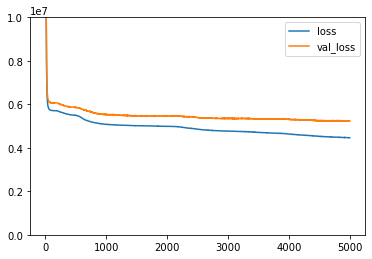

In [27]:
losses.plot()
plt.ylim(0,10000000)

## model ewaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
predictions = model.predict(X_test)

In [30]:
mean_absolute_error(y_test,predictions)

1421.3418419710845

In [31]:
np.sqrt(mean_squared_error(y_test,predictions))

2287.346153412493

In [32]:
r2_score(y_test,predictions)

0.6994378184008687

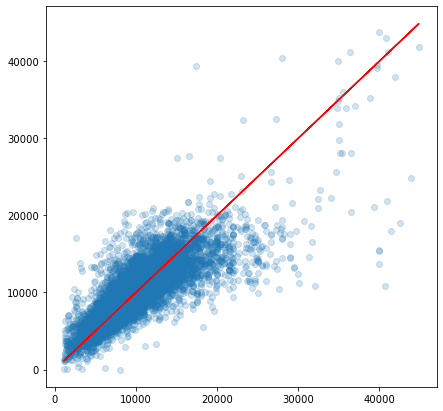

In [33]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

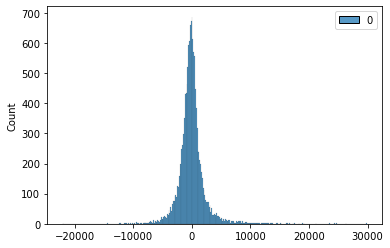

In [35]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [36]:
predictions.reshape(y_test.shape[0])[:20]

array([ 7720.4775, 10514.612 , 12824.428 ,  9430.621 ,  7920.461 ,
       18802.691 , 10420.858 ,  8169.0513,  8918.904 ,  9412.429 ,
        9786.2   ,  9426.862 , 13046.7705, 11847.486 , 11941.4375,
       11767.971 , 10155.694 , 10495.188 ,  7504.4683, 16972.236 ],
      dtype=float32)

In [37]:
y_test[:20]

array([ 8745.09803922, 12500.        ,  8317.58034026,  8380.        ,
        7650.00831808, 14303.79746835, 13777.49029754,  8250.        ,
        8460.23688663, 10079.99606222,  8496.45390071,  9178.41952093,
       14545.13618677, 13990.        , 11538.46153846,  8093.41492374,
        9326.08695652,  9935.20518359,  9250.        , 17704.16904626])

In [38]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([0.88283488, 0.84116898, 1.54184597, 1.12537245, 1.03535325,
       1.31452444, 0.75636841, 0.99018803, 1.05421449, 0.93377305,
       1.15179819, 1.02706814, 0.8969851 , 0.84685392, 1.03492458,
       1.45401797, 1.08895557, 1.05636354, 0.81129387, 0.95865761])

## saving data

In [39]:
# from datetime import datetime
# from tensorflow.keras.models import load_model
# timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
# model.save('models_ann\\' + timestamp)

In [40]:
# import joblib
# joblib.dump(scaler, 'scaler')